### Retrieving images from GSV

In this notebook i will illustrate Google Street View images retrieval. There are 3 modalities considered as part of the streetview_collection module.

<ol>
<li><b>Full panorama retrieval:</b> Obtains 8 views to construct a panorama, and then individual views can be obtained from that. This is costly in terms of API use, since you need to perform 8 calls per point</li>
<br>
<li><b>Sidewalk view retrieval:</b> For this one you need to provide two points, the one you are interested in, and another one within the segment that the point lies on. This is necessary because bearing is calculated to know at which angles the sidewalks can be found.</li>
<br>
<li><b>Individual view retrieval:</b> This is the modality with the least cost. You obtain one image at the point. This one is used when you know exactly where to point the camera at. I have used this one for obtaining façade images to assess their characteristics for example.</li>

</ol>

### Full panorama retrieval

To use GSV retrieval functionalities you will need an API Key, which can be obtained from:

<a>https://console.cloud.google.com</a>



In [1]:
from alivestreets.streetview_collection.streetview_collection import StreetViewImageCollector
import os

#Create an instance of the collector
#You will need an API key 
api_key = ""
image_collector = StreetViewImageCollector(api_key, fov = 90)

output_dir = os.path.join(os.getcwd(), "data", "panoramic_view")
latitude = 48.85782811266657
longitude = 2.2917160320506755

#uncomment to get the panorama
image, metadata = image_collector.collect_panoramic_with_views(
    latitude, 
    longitude, 
    output_dir, 
    save_views = True
)

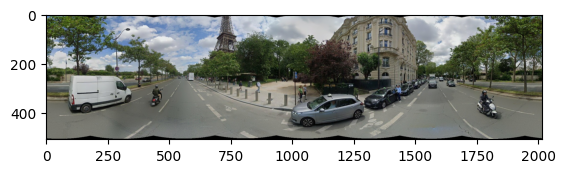

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_dir = os.path.join(output_dir, "panoramic.jpg")
image = np.array(Image.open(image_dir))

plt.imshow(image)

You can get tspecific views of interest using the camera module

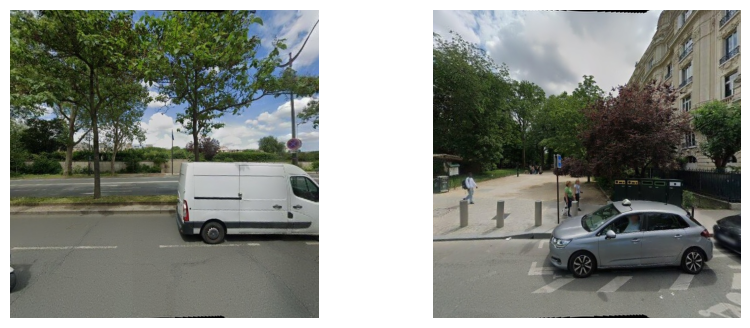

In [3]:

from alivestreets.camera.camera_utilities import extract_view_from_panorama
from alivestreets.streetview_collection.streetview_collection import compute_bearing_between_locations

#To get the bearing (street direction) you might need to know another point on the same street, or two points defining the segment
#In this case i will use another point on the same street close to the point where the panoramic was taken

ref_longitude = 48.85795793560459
ref_latitude = 2.291918369294998
bearing = compute_bearing_between_locations((latitude, longitude), (ref_latitude, ref_longitude))
#The way we collect images might generate an offset of 360/8
offset = 20
#Once you have the bearing you can obtain the directions where the sidewalks are located
angle_sidewalk_1 = (bearing+90)%360
angle_sidewalk_2 = (bearing-90)%360

#Now before obtaining the view the angle needs to be translated to a range going from -180 to 180

fov = 90
pitch = 0

view_left = extract_view_from_panorama(
    image, 
    angle_sidewalk_1, 
    pitch = pitch, 
    fov = fov,
    width = 640, 
    height = 640, 
    heading_offset = 22.5
)

view_right = extract_view_from_panorama(
    image,
    angle_sidewalk_2,
    pitch = pitch, 
    fov = fov, 
    width = 640,
    height = 640,
    heading_offset = 22.5
)

fig, ax = plt.subplots(1,2,figsize = (10, 4))
ax[0].imshow(view_left)
ax[0].set_axis_off()
ax[1].imshow(view_right)
ax[1].set_axis_off()

### Sidewalk views using two points along the street

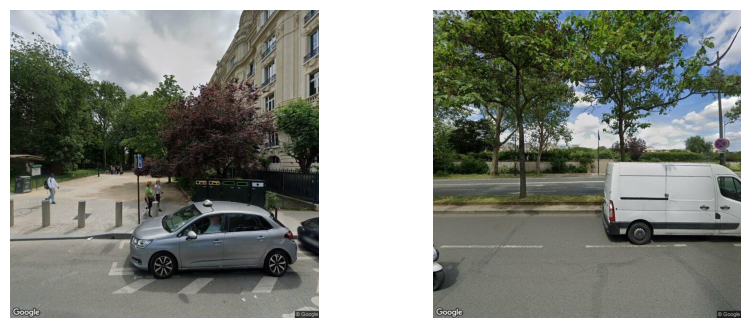

In [4]:
#If you have two points on the street you can obtain the sidewalk views

#Point latitude and longitude
latitude = 48.85782811266657
longitude = 2.2917160320506755

#Reference point coordinates
ref_longitude = 48.85795793560459
ref_latitude = 2.291918369294998

output_dir = os.path.join(os.getcwd(), "data", "sidewalk_views")

#Get the sidewalk views and display them
images, metadata = image_collector.collect_sidewalk_views(
    latitude,
    longitude,
    ref_longitude,
    ref_latitude,
    output_dir
)

fig, ax = plt.subplots(1,2, figsize = (10, 4))
ax[0].imshow(images[0])
ax[0].set_axis_off()
ax[1].imshow(images[1])
ax[1].set_axis_off()

### Single view retrieval

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

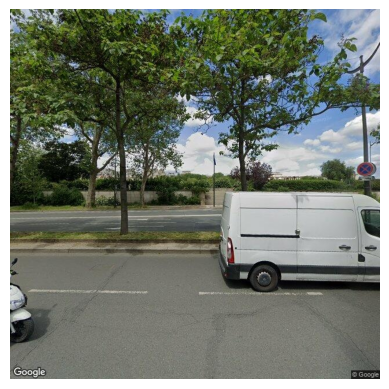

In [7]:
pitch = 0
heading = angle_sidewalk_1+100
output_dir = os.path.join(os.getcwd(), "data", "single_view")

image,metadata = image_collector.collect_single_view(
    latitude,
    longitude,
    pitch,
    314.08,
    output_dir,
    filename = "single_view.jpg"
)

plt.figure()
plt.imshow(image)
plt.axis("off")
